In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix


def plot_decision_boundary(func, X, y, figsize=(9, 6)):
    """
    Genera una figura con las franjas donde 'func' toma los valores 
    [0, 0.25, 0.5, 0.75, 1], pintando cada franja de un color, desde
    el rojo (0) hasta el azul (1)

    Argumentos:
    func -- función que recibe una fila de X y devuelve un valor 
    entre 0 y 1
    X -- datos sobre los que se calcula la función 'func'
    y -- etiquetas de los datos X

    Ejemplo:
    plot_decision_boundary(lambda x: model.predict(x), X, y)
    """

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)


def plot_multiclass_decision_boundary(model, X, y):
    """
    Genera una figura con las fronteras de decisión de un modelo 
    de Keras

    Argumentos:
    model -- modelo de Keras
    X, y -- datos y etiquetas
    """

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()


def plot_loss_accuracy(history):
    """
    Genera una figura con la evolución del coste y la precisión durante
    el entrenamiento de un modelo en Keras. 

    Argumentos:
    history -- un objeto History devuelto por el método fit de Keras
    https://keras.io/models/model/#fit
    """

    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))


def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    

def plot_confusion_matrix(model, X, y):
    """
    Genera una figura con un mapa de calor que representa la matriz
    de confusión del modelo 'model' aplicado sobre los datos X comparado
    con las etiquetas de y

    Argumentos:
    model -- modelo de Keras
    X, y -- datos y etiquetas
    """

    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d',
                cmap='YlGnBu', alpha=0.8, vmin=0)


def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Loss")
    
    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")

    plt.tight_layout()
    

def make_sine_wave():
    c = 3
    num = 2400
    step = num/(c*4)
    np.random.seed(0)
    x0 = np.linspace(-c*np.pi, c*np.pi, num)
    x1 = np.sin(x0)
    noise = np.random.normal(0, 0.1, num) + 0.1
    noise = np.sign(x1) * np.abs(noise)
    x1  = x1 + noise
    x0 = x0 + (np.asarray(range(num)) / step) * 0.3
    X = np.column_stack((x0, x1))
    y = np.asarray([int((i/step)%2==1) for i in range(len(x0))])
    return X, y


def make_multiclass(N=500, D=2, K=3, print=False):
    """
    Genera datos aleatorios donde cada clase se distribuye sobre
    una rama helicoidal que parte del origen de coordenadas

    N -- número de puntos por clase
    D -- número de dimensiones de cada dato 
    K -- número de clases
    """

    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    if print:
        fig = plt.figure(figsize=(6, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)
        plt.xlim([-1,1])
        plt.ylim([-1,1])
        plt.savefig('img/multiclass.pdf')
    return X, y
    


In [13]:
from sklearn.datasets import make_circles, make_moons
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from google.colab import files


def logisticRegression():
    #X, y = make_circles(n_samples=1000, noise=0.05, factor=0.3, random_state=0)
    
    X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)
    
    model = keras.Sequential()
    
    model.add(layers.Dense(units=1, input_shape=(2,), activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x=X, y=y, verbose=0, epochs=50)

    plot_loss_accuracy(history)
    plt.savefig("plot_loss_acc_logistic_regression.png")
    #files.download("plot_loss_acc_logistic_regression.png")
    
    plot_data(X,y)
    plt.savefig("data_moons.png")
    #files.download("data_moons.png")

    plot_decision_boundary(lambda x: model.predict(x), X, y)
    plt.savefig("plot_decision_boundary_logistic_regression.png")
    #files.download("plot_decision_boundary_logistic_regression.png")

    y_pred = model.predict_classes(X, verbose=0)
    print(classification_report(y, y_pred))

    plot_confusion_matrix(model, X, y)
    plt.savefig("plot_confusion_matrix_logistic_regression.png")
    #files.download("plot_confusion_matrix_logistic_regression.png")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.75      0.74      0.74       500
           1       0.74      0.75      0.75       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



<Figure size 576x432 with 0 Axes>

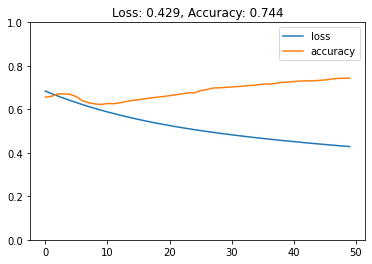

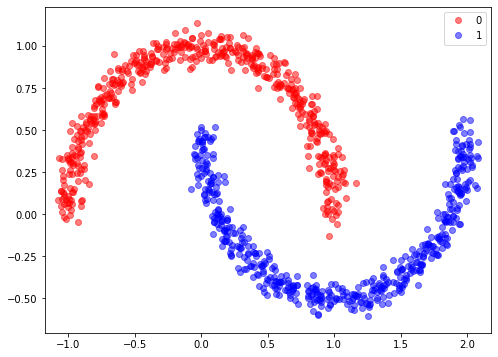

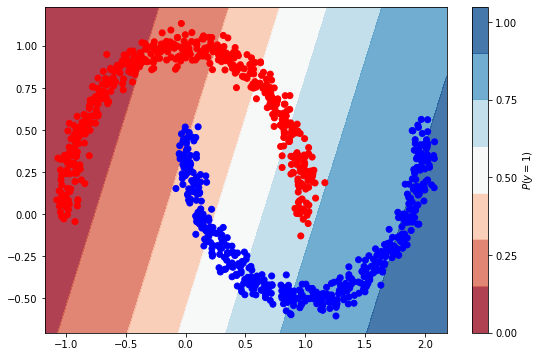

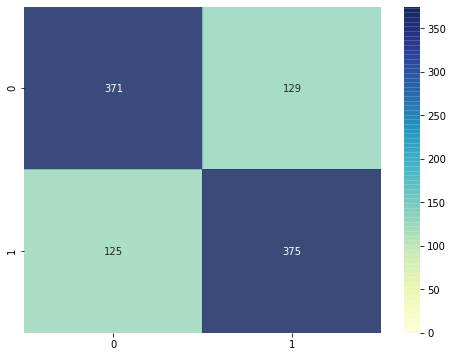

In [14]:
logisticRegression()

In [15]:
import tensorflow as tf

def plot_data_multiclass_3(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.plot(X[y==2, 0], X[y==2, 1], 'og', alpha=0.5, label=2)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()

def multiclass_neuronal_network():
    X, y = make_multiclass(K=3)

    plot_data_multiclass_3(X,y)
    plt.savefig("multiclass.png")
    #files.download("multiclass.png")

    y_one_hot = tf.keras.utils.to_categorical(y, num_classes=3)
    
    model = keras.Sequential()
    
    #First layer
    model.add(layers.Dense(units=64, input_shape=(2,), activation='tanh'))
    #Second layer
    model.add(layers.Dense(units=64, activation='tanh'))
    #Third layer
    model.add(layers.Dense(units=32, activation='tanh'))
    #Output layer
    model.add(layers.Dense(units=3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x=X, y=y_one_hot, verbose=0, epochs=50)

    plot_loss_accuracy(history)
    plt.savefig("plot_loss_acc_simple_red.png")
    files.download("plot_loss_acc_simple_red.png")

    y_pred = model.predict_classes(X, verbose=0)
    print(classification_report(y, y_pred))

    plot_confusion_matrix(model, X, y)
    plt.savefig("plot_confusion_matrix_simple_red.png")
    files.download("plot_confusion_matrix_simple_red.png")

    plot_multiclass_decision_boundary(model, X, y)
    plt.savefig("plot_decision_boundary_matrix_simple_red.png")
    files.download("plot_decision_boundary_matrix_simple_red.png")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       500
         1.0       1.00      1.00      1.00       500
         2.0       0.99      1.00      1.00       500

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

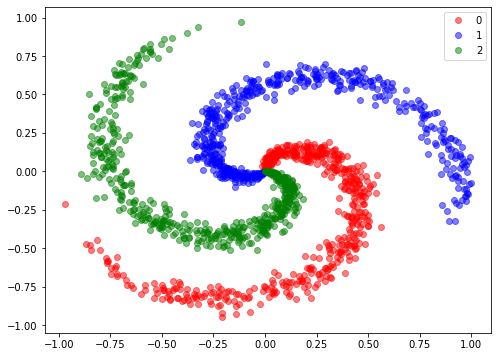

<Figure size 576x432 with 0 Axes>

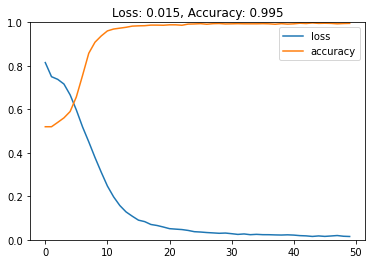

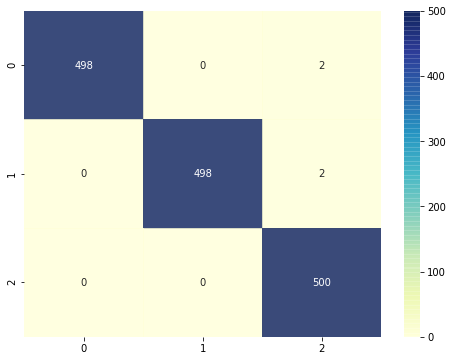

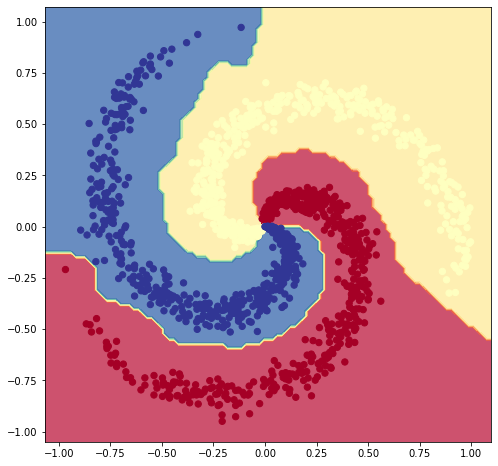

In [16]:
multiclass_neuronal_network()

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

def model_2_layers_sigmoid(X_train, y_train_one_hot, X_test, y_test):
    model = keras.Sequential()
    
    #First layer
    model.add(layers.Dense(units=64, input_shape=(400,), activation='sigmoid'))
    #Second layer
    model.add(layers.Dense(units=64, activation='sigmoid'))
    #Output layer
    model.add(layers.Dense(units=11, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x=X_train, y=y_train_one_hot, verbose=0, epochs=50)

    plot_loss_accuracy(history)
    plt.savefig("plot_loss_acc_2_ly_sig.png")
    files.download("plot_loss_acc_2_ly_sig.png")

    y_pred = model.predict_classes(X_test, verbose=0)
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(model, X_test, y_test)
    plt.savefig("plot_confusion_matrix_2_ly_sig.png")
    files.download("plot_confusion_matrix_2_ly_sig.png")

def model_3_layers_sigmoid(X_train, y_train_one_hot, X_test, y_test):
    model = keras.Sequential()
    
    #First layer
    model.add(layers.Dense(units=128, input_shape=(400,), activation='sigmoid'))
    #Second layer
    model.add(layers.Dense(units=64, activation='sigmoid'))
    #Third layer
    model.add(layers.Dense(units=32, activation='sigmoid'))
    #Output layer
    model.add(layers.Dense(units=11, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x=X_train, y=y_train_one_hot, verbose=0, epochs=50)

    plot_loss_accuracy(history)
    plt.savefig("plot_loss_acc_3_ly_sig.png")
    files.download("plot_loss_acc_3_ly_sig.png")

    y_pred = model.predict_classes(X_test, verbose=0)
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(model, X_test, y_test)
    plt.savefig("plot_confusion_matrix_3_ly_sig.png")
    files.download("plot_confusion_matrix_3_ly_sig.png")

def model_2_layers_tanh(X_train, y_train_one_hot, X_test, y_test):
    model = keras.Sequential()
    
    #First layer
    model.add(layers.Dense(units=64, input_shape=(400,), activation='tanh'))
    #Second layer
    model.add(layers.Dense(units=64, activation='tanh'))
    #Output layer
    model.add(layers.Dense(units=11, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x=X_train, y=y_train_one_hot, verbose=0, epochs=50)

    plot_loss_accuracy(history)
    plt.savefig("plot_loss_acc_2_ly_tanh.png")
    files.download("plot_loss_acc_2_ly_tanh.png")

    y_pred = model.predict_classes(X_test, verbose=0)
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(model, X_test, y_test)
    plt.savefig("plot_confusion_matrix_2_ly_tanh.png")
    files.download("plot_confusion_matrix_2_ly_tanh.png")

def model_3_layers_tanh(X_train, y_train_one_hot, X_test, y_test):
    model = keras.Sequential()
    
    #First layer
    model.add(layers.Dense(units=128, input_shape=(400,), activation='tanh'))
    #Second layer
    model.add(layers.Dense(units=64, activation='tanh'))
    #Third layer
    model.add(layers.Dense(units=32, activation='tanh'))
    #Output layer
    model.add(layers.Dense(units=11, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x=X_train, y=y_train_one_hot, verbose=0, epochs=50)

    plot_loss_accuracy(history)
    plt.savefig("plot_loss_acc_3_ly_tanh.png")
    files.download("plot_loss_acc_3_ly_tanh.png")

    y_pred = model.predict_classes(X_test, verbose=0)
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(model, X_test, y_test)
    plt.savefig("plot_confusion_matrix_3_ly_tanh.png")
    files.download("plot_confusion_matrix_3_ly_tanh.png")

def digit_recognition():
    data = loadmat('/content/drive/My Drive/Colab Data/ex4data1.mat')
    X = data['X']
    y = data['y']  
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , stratify=y)
    y_train_one_hot = tf.keras.utils.to_categorical(y_train)

    model_2_layers_sigmoid(X_train, y_train_one_hot, X_test, y_test)
    model_2_layers_tanh(X_train, y_train_one_hot, X_test, y_test)
    model_3_layers_sigmoid(X_train, y_train_one_hot, X_test, y_test)
    model_3_layers_tanh(X_train, y_train_one_hot, X_test, y_test)
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           1       0.95      0.96      0.95       165
           2       0.92      0.90      0.91       165
           3       0.90      0.89      0.90       165
           4       0.94      0.92      0.93       165
           5       0.90      0.90      0.90       165
           6       0.95      0.92      0.94       165
           7       0.95      0.92      0.94       165
           8       0.85      0.95      0.90       165
           9       0.91      0.92      0.92       165
          10       0.96      0.95      0.95       165

    accuracy                           0.92      1650
   macro avg       0.92      0.92      0.92      1650
weighted avg       0.92      0.92      0.92      1650



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           1       0.96      0.95      0.95       165
           2       0.91      0.90      0.91       165
           3       0.92      0.88      0.90       165
           4       0.92      0.93      0.92       165
           5       0.87      0.94      0.90       165
           6       0.96      0.93      0.94       165
           7       0.97      0.93      0.95       165
           8       0.89      0.93      0.91       165
           9       0.88      0.91      0.89       165
          10       0.95      0.95      0.95       165

    accuracy                           0.92      1650
   macro avg       0.92      0.92      0.92      1650
weighted avg       0.92      0.92      0.92      1650



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           1       0.96      0.97      0.96       165
           2       0.94      0.89      0.91       165
           3       0.89      0.93      0.91       165
           4       0.96      0.92      0.93       165
           5       0.90      0.91      0.90       165
           6       0.96      0.93      0.95       165
           7       0.97      0.92      0.94       165
           8       0.89      0.94      0.91       165
           9       0.87      0.93      0.90       165
          10       0.95      0.95      0.95       165

    accuracy                           0.93      1650
   macro avg       0.93      0.93      0.93      1650
weighted avg       0.93      0.93      0.93      1650



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           1       0.97      0.95      0.96       165
           2       0.93      0.90      0.91       165
           3       0.91      0.89      0.90       165
           4       0.93      0.93      0.93       165
           5       0.89      0.92      0.90       165
           6       0.96      0.95      0.95       165
           7       0.93      0.92      0.93       165
           8       0.91      0.91      0.91       165
           9       0.87      0.90      0.89       165
          10       0.95      0.96      0.95       165

    accuracy                           0.92      1650
   macro avg       0.92      0.92      0.92      1650
weighted avg       0.92      0.92      0.92      1650



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 576x432 with 0 Axes>

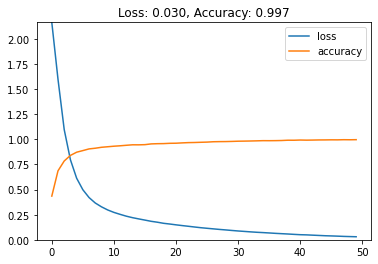

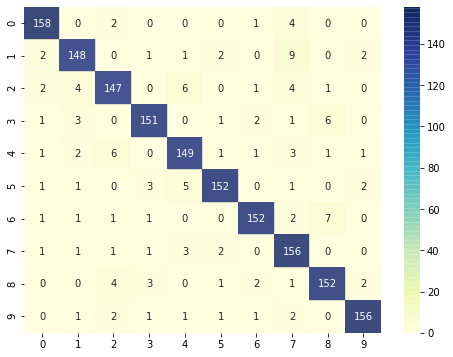

<Figure size 576x432 with 0 Axes>

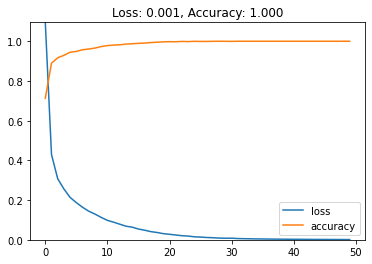

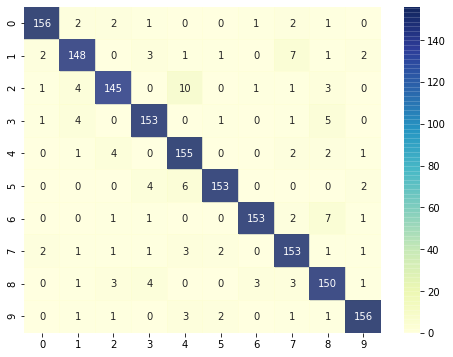

<Figure size 576x432 with 0 Axes>

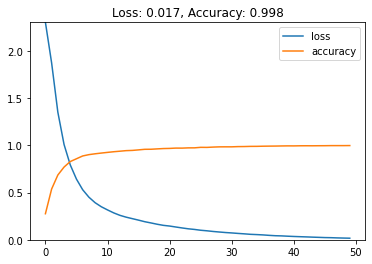

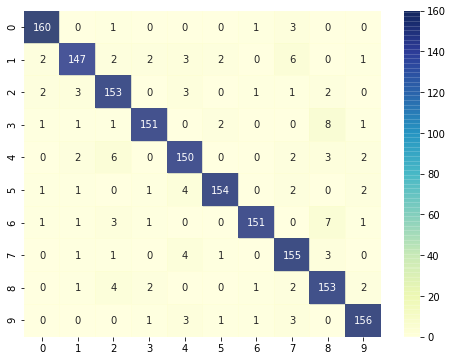

<Figure size 576x432 with 0 Axes>

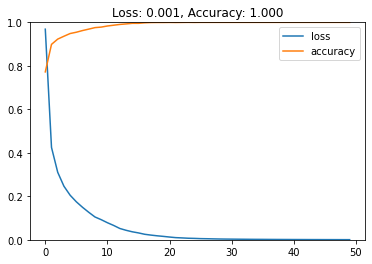

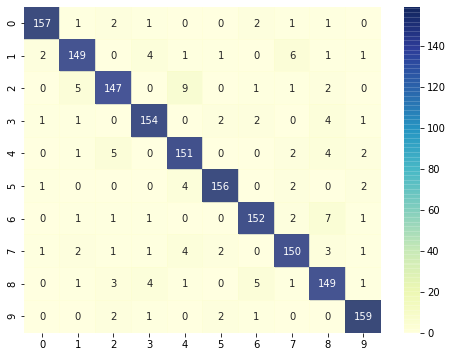

In [33]:
digit_recognition()